In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data_final/final_estat_data.csv')

# Sort

filtered_df = df.sort_values(by='country')
filtered_df

,country,year,iso_code,value
0,Albania,2019,AL,38.042
1,Albania,2020,AL,45.015
2,Albania,2021,AL,41.389
3,Albania,2022,AL,44.076
4,Albania,2023,AL,46.620
...,...,...,...,...
164,Sweden,2023,SE,66.393
163,Sweden,2022,SE,66.287
162,Sweden,2021,SE,62.527
161,Sweden,2020,SE,60.124


In [72]:
print(f'Data shape: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns')

Data shape: 179 rows, 4 columns


In [73]:
# Get the distinct countries
distinct_countries_count = filtered_df['country'].nunique()
distinct_countries = filtered_df['country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')



There are 37 countries in the dataset
Countries: ['Albania' 'Austria' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia'
 'Euro area – 20 countries (from 2023)'
 'European Union - 27 countries (from 2020)' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kosovo*' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Montenegro' 'Netherlands'
 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania' 'Serbia'
 'Slovakia' 'Slovenia' 'Spain' 'Sweden']


country     0
year        0
iso_code    0
value       0
dtype: int64

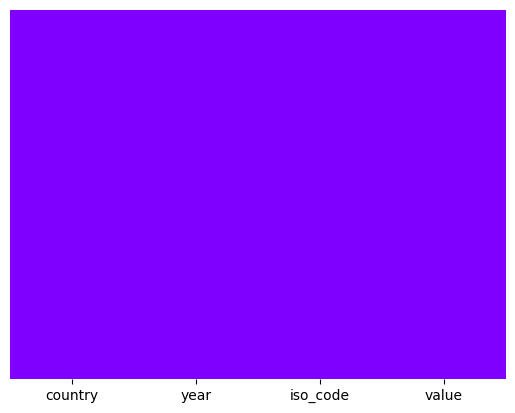

In [74]:
# Display null values
sns.heatmap(filtered_df.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')

# Count null values
filtered_df.isnull().sum()

In [75]:
# Drop 'not countries'
rows_to_drop = ['Euro area – 20 countries (from 2023)', 'European Union - 27 countries (from 2020)']

filtered_df = filtered_df[~filtered_df['country'].isin(rows_to_drop)]
filtered_df

,country,year,iso_code,value
0,Albania,2019,AL,38.042
1,Albania,2020,AL,45.015
2,Albania,2021,AL,41.389
3,Albania,2022,AL,44.076
4,Albania,2023,AL,46.620
...,...,...,...,...
164,Sweden,2023,SE,66.393
163,Sweden,2022,SE,66.287
162,Sweden,2021,SE,62.527
161,Sweden,2020,SE,60.124


In [77]:

filtered_df.describe()

,year,value
count,171.000000,171.000000
mean,2020.959064,28.667760
std,1.407362,16.547847
min,2019.000000,7.046000
25%,2020.000000,17.382000
50%,2021.000000,22.671000
75%,2022.000000,37.181000
max,2023.000000,83.725000


In [78]:
# Get the distinct countries
distinct_countries_count = filtered_df['country'].nunique()
distinct_countries = filtered_df['country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')

There are 35 countries in the dataset
Countries: ['Albania' 'Austria' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy'
 'Kosovo*' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden']


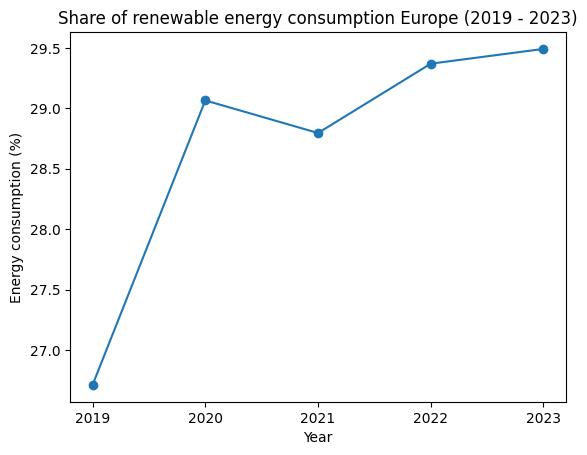

In [80]:
# TREND ANALYSIS OVER TIME - FINAL ENERGY CONSUPMTION OVER THE YEARS

yearly_fec = filtered_df.groupby('year')['value'].mean()
plt.plot(yearly_fec.index, yearly_fec.values, marker='o')
plt.xticks([2019,2020,2021,2022,2023])
plt.title('Share of renewable energy consumption Europe (2019 - 2023)')
plt.xlabel('Year')
plt.ylabel('Energy consumption (%)')
plt.show()

In [63]:
# TOP COUNTRIES WITH THE MOST % OF RENEWABLE ENERGY CONSUMPTION IN 2023

data_2023 = filtered_df_cleaned[filtered_df_cleaned['year'] == 2023]

top_countries = data_2023[['country', 'value']].sort_values(by='value', ascending=False)

print(top_countries.head(10))



       country  value
369    Germany  187.0
356      Malta  155.3
376     France  130.0
358     Poland  120.9
353  Lithuania  113.9
380      Italy  108.7
339     Cyprus  102.2
360    Romania   98.2
349    Croatia   98.1
338   Bulgaria   98.1
